In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

algo2 = pd.read_csv('algo2.csv')
optsol = pd.read_csv('optsol.csv')

In [46]:
algo2.sample(n=5)

,runtime_algo2,input,input_size,vertex_count,cost_algo2,output_algo2
90,0.000025,"[2, 4, 3, 1]-[4, 3, 2, 1]",2,4,2,"['[(2, 1), (2, 3), (2, 4), (3, 1), (4, 1), (4,..."
886,0.000194,"[1, 2, 4, 3]-[1, 3, 2, 4]-[2, 3, 1, 4]-[2, 3, ...",9,4,8,"['[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (4,..."
1364,0.000525,"[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, ...",14,4,16,"['[(1, 2), (1, 3), (1, 4), (2, 3), (4, 3)]', '..."
580,0.000093,"[1, 4, 2, 3]-[2, 3, 1, 4]-[3, 1, 2, 4]-[3, 1, ...",6,4,5,"['[(1, 2), (1, 3), (2, 3), (4, 2), (4, 3)]', '..."
33,0.000032,"[1, 3, 2]-[2, 1, 3]-[3, 2, 1]",3,3,3,"['[(1, 2), (1, 3), (3, 2)]', '[(1, 3), (2, 1),..."


In [48]:
optsol.sample(n=5)

,input,input_size,vertex_count,cost_optsol,output_optsol
764,"[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, 2, 3]-[1, 4, ...",8,4,4,"['[(2, 4), (1, 2), (3, 4), (3, 2), (1, 3), (1,..."
1180,"[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, ...",12,4,4,"['[(1, 3), (1, 2), (4, 3), (3, 2), (4, 1), (4,..."
960,"[1, 2, 3, 4]-[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 4, ...",10,4,7,"['[(1, 4), (1, 2), (4, 3), (3, 2), (1, 3), (4,..."
4,"[3, 1, 2]",1,3,1,"['[(3, 1), (3, 2), (1, 2)]']"
1211,"[1, 2, 3, 4]-[1, 3, 2, 4]-[1, 4, 3, 2]-[2, 3, ...",13,4,7,"['[(1, 4), (1, 2), (4, 3), (3, 2), (1, 3), (4,..."


In [101]:
results = pd.merge(algo2, optsol, how='outer')
results['num_rel_algo2'] = results['output_algo2'].map(lambda x: x.count('('))
results['num_rel_optsol'] = results['output_optsol'].map(lambda x: x.count('('))

print(results.shape)
results.sample(n=5)

(2212, 10)


,runtime_algo2,input,input_size,vertex_count,cost_algo2,output_algo2,cost_optsol,output_optsol,num_rel_algo2,num_rel_optsol
2115,0.002036,"[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, ...",22,4,29,"['[(1, 2), (1, 3), (1, 4), (2, 3), (4, 3)]', '...",5,"['[(2, 4), (2, 1), (3, 4), (3, 1), (3, 2), (1,...",137,17
2029,0.001913,"[1, 2, 3, 4]-[1, 2, 4, 3]-[1, 3, 2, 4]-[1, 4, ...",21,4,27,"['[(1, 3), (1, 4), (2, 3), (2, 4)]', '[(1, 2),...",5,"['[(2, 4), (1, 2), (3, 4), (3, 2), (1, 3), (1,...",129,19
1866,0.001473,"[1, 2, 3, 4]-[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, ...",19,4,23,"['[(1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]', '...",5,"['[(2, 3), (2, 4), (1, 2), (3, 4), (1, 3), (1,...",109,18
1587,0.000957,"[1, 2, 3, 4]-[1, 3, 2, 4]-[1, 4, 2, 3]-[1, 4, ...",17,4,18,"['[(1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]', '...",7,"['[(2, 3), (1, 4), (1, 2), (4, 3), (1, 3), (4,...",90,33
523,0.000214,"[1, 3, 2, 4]-[1, 3, 4, 2]-[1, 4, 3, 2]-[2, 3, ...",6,4,6,"['[(1, 2), (1, 3), (1, 4), (3, 2), (3, 4)]', '...",4,"['[(2, 4), (1, 2), (3, 4), (3, 2), (1, 3), (1,...",33,22


In [102]:
results['isApprox'] = np.where(results['cost_algo2'] >= results['cost_optsol'], results['cost_algo2'], np.nan)
print(results['isApprox'].isna().sum())

results.drop('isApprox', axis=1, inplace=True)

0


<AxesSubplot:xlabel='input_size', ylabel='runtime_algo2'>

<Figure size 432x288 with 0 Axes>

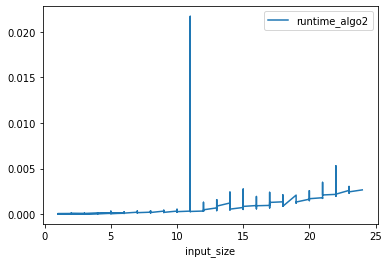

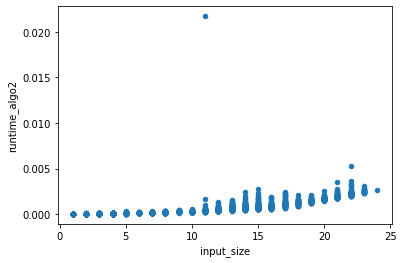

In [103]:
runtime = results[['input_size', 'runtime_algo2']]

plt.figure()
runtime.plot(x='input_size', y='runtime_algo2')
runtime.plot.scatter(x='input_size', y='runtime_algo2')

<AxesSubplot:xlabel='input_size', ylabel='cost_optsol'>

<Figure size 432x288 with 0 Axes>

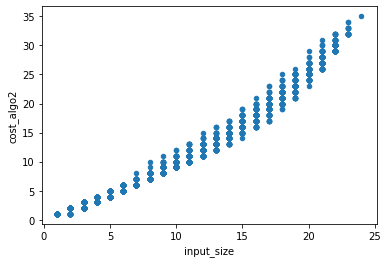

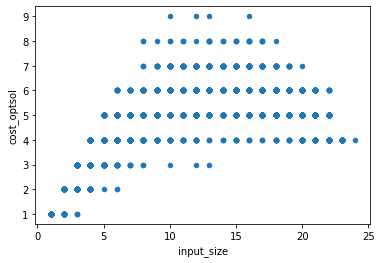

In [104]:
cost = results[['input_size', 'vertex_count', 'cost_algo2', 'cost_optsol']]

plt.figure()
cost.plot.scatter(x='input_size', y='cost_algo2')
cost.plot.scatter(x='input_size', y='cost_optsol')

<AxesSubplot:xlabel='input_size', ylabel='num_rel_optsol'>

<Figure size 432x288 with 0 Axes>

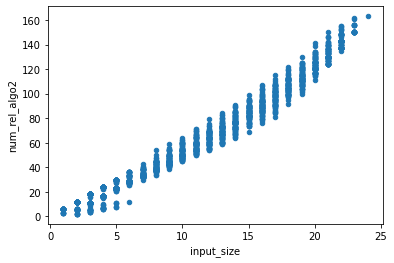

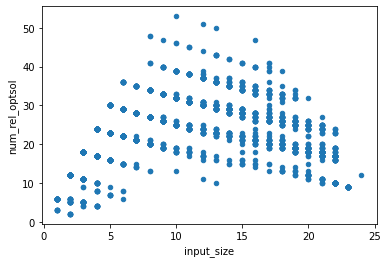

In [106]:
num_rel = results[['input_size', 'num_rel_algo2', 'num_rel_optsol']]

plt.figure()
num_rel.plot.scatter(x='input_size', y='num_rel_algo2')
num_rel.plot.scatter(x='input_size', y='num_rel_optsol')